<a href="https://colab.research.google.com/github/trietp1253201581/NaturalLanguangeProcessing/blob/main/nlp_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Embeddings for Natural Language Processing

## Dữ liệu

In [8]:
!ls .

data  kaggle.json  sample_data


In [9]:
import os

IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ
IS_KAGGLE

False

In [10]:
if IS_KAGGLE:
    data_dir = '../input/quora-insincere-questions-classification'
    train_fname = data_dir + '/train.csv'
    test_fname = data_dir + '/test.csv'
    sample_fname = data_dir + '/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    data_dir = 'data'
    train_fname = data_dir + '/train.csv.zip'
    test_fname = data_dir + '/test.csv.zip'
    sample_fname = data_dir + '/sample_submission.csv.zip'

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import pandas as pd

In [12]:
train_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)

In [13]:
train_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [14]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


## Tiền xử lý

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [16]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

In [18]:
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words, lowercase=True, max_features=10000)

In [21]:
sample_df = train_df.sample(100000, random_state=42)
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [22]:
%%time
vectorizer.fit(sample_df['question_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 26.9 s, sys: 94.9 ms, total: 27 s
Wall time: 27.3 s


TfidfVectorizer(max_features=10000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7c13c9894160>)

In [23]:
inputs = vectorizer.transform(sample_df['question_text'])

In [24]:
targets = sample_df['target']

In [25]:
inputs.shape, targets.shape

((100000, 10000), (100000,))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets,
                                                                        test_size=0.3, random_state=42)

In [28]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn

In [29]:
train_tensors = F.normalize(torch.tensor(train_inputs.toarray(), dtype=torch.float32), dim=0)
val_tensors = F.normalize(torch.tensor(val_inputs.toarray(), dtype=torch.float32), dim=0)

In [30]:
train_tensors.shape

torch.Size([70000, 10000])

In [31]:
train_datasets = TensorDataset(train_tensors, torch.tensor(train_targets.values, dtype=torch.float32))
val_datasets = TensorDataset(val_tensors, torch.tensor(val_targets.values, dtype=torch.float32))

In [32]:
batch_size = 128

In [33]:
train_dataloader = DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_datasets, batch_size=batch_size)

In [34]:
for inputs, targets in train_dataloader:
    print(inputs.shape, targets.shape)
    print(targets)
    break

torch.Size([128, 10000]) torch.Size([128])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])


## Model

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [36]:
def evaluate(model, val_dataloader):
    outputs = [model.validation_step(batch) for batch in val_dataloader]
    return model.validation_epoch_end(outputs)

In [37]:
def fit(epochs, lr, model, train_dataloader, val_dataloader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr, weight_decay=1e-5)

    for epoch in range(epochs):
        for batch in train_dataloader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_dataloader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [38]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [39]:
class LogRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10000, 1)

    def forward(self, x):
        return self.linear(x)

    def training_step(self, batch):
        inputs, targets = batch
        outputs = self(inputs)
        probs = to_device(torch.sigmoid(outputs[:,0]), get_default_device())
        loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20., device=get_default_device()))
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        outputs = self(inputs)
        probs = to_device(torch.sigmoid(outputs[:,0]), get_default_device())
        loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20., device=get_default_device()))
        preds = (probs > 0.5).int()
        acc = accuracy_score(targets.cpu(), preds.cpu()) # Move to CPU
        f1 = f1_score(targets.cpu(), preds.cpu()) # Move to CPU
        return {'val_loss': loss.item(), 'val_acc': acc, 'val_f1': f1}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = np.mean(batch_losses)
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = np.mean(batch_accs)
        batch_f1s = [x['val_f1'] for x in outputs]
        epoch_f1 = np.mean(batch_f1s)
        return {'val_loss': epoch_loss, 'val_acc': epoch_acc, 'val_f1': epoch_f1}
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}, val_f1: {:.4f}".format(
            epoch, result['val_loss'], result['val_acc'], result['val_f1']))

In [40]:
train_dataloader = DeviceDataLoader(train_dataloader, get_default_device())
val_dataloader = DeviceDataLoader(val_dataloader, get_default_device())

In [41]:
model = to_device(LogRegModel(), get_default_device())

In [42]:
get_default_device()

device(type='cuda')

In [43]:
history = [evaluate(model, val_dataloader)]
history

[{'val_loss': 13.825696267472937,
  'val_acc': 0.8666001773049646,
  'val_f1': 0.06886452735552233}]

In [44]:
history += fit(5, 0.01, model, train_dataloader, val_dataloader)

Epoch [0], val_loss: 4.1721, val_acc: 0.9393, val_f1: 0.0000
Epoch [1], val_loss: 3.7209, val_acc: 0.9393, val_f1: 0.0000
Epoch [2], val_loss: 3.3804, val_acc: 0.9395, val_f1: 0.0110
Epoch [3], val_loss: 3.1589, val_acc: 0.9415, val_f1: 0.0956
Epoch [4], val_loss: 3.0203, val_acc: 0.9435, val_f1: 0.1989


In [45]:
history += fit(5, 0.01, model, train_dataloader, val_dataloader)

Epoch [0], val_loss: 2.9586, val_acc: 0.9452, val_f1: 0.2679
Epoch [1], val_loss: 2.8920, val_acc: 0.9454, val_f1: 0.3195
Epoch [2], val_loss: 2.8710, val_acc: 0.9464, val_f1: 0.3899
Epoch [3], val_loss: 2.8522, val_acc: 0.9467, val_f1: 0.4160
Epoch [4], val_loss: 2.8415, val_acc: 0.9464, val_f1: 0.4307


In [46]:
history += fit(5, 0.001, model, train_dataloader, val_dataloader)

Epoch [0], val_loss: 2.8508, val_acc: 0.9461, val_f1: 0.4354
Epoch [1], val_loss: 2.8532, val_acc: 0.9459, val_f1: 0.4360
Epoch [2], val_loss: 2.8553, val_acc: 0.9459, val_f1: 0.4386
Epoch [3], val_loss: 2.8554, val_acc: 0.9460, val_f1: 0.4408
Epoch [4], val_loss: 2.8539, val_acc: 0.9461, val_f1: 0.4426


In [47]:
losses = [x['val_loss'] for x in history]
accs = [x['val_acc'] for x in history]
f1s = [x['val_f1'] for x in history]

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

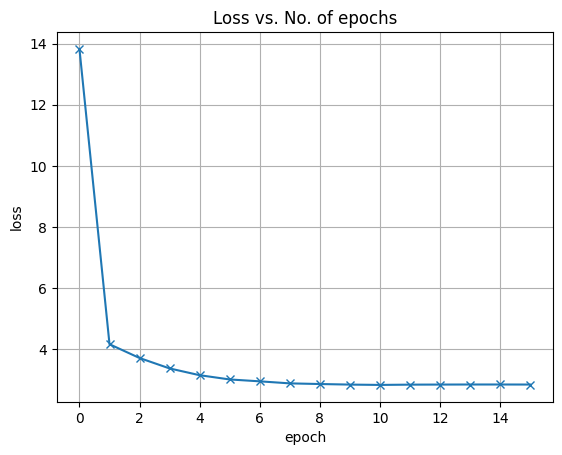

In [49]:
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.title('Loss vs. No. of epochs');

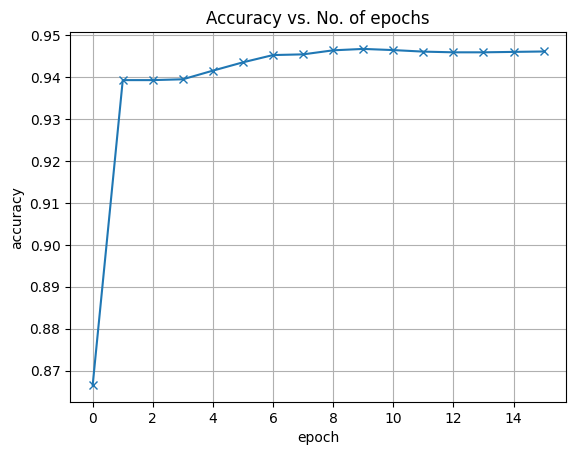

In [50]:
plt.plot(accs, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.title('Accuracy vs. No. of epochs');

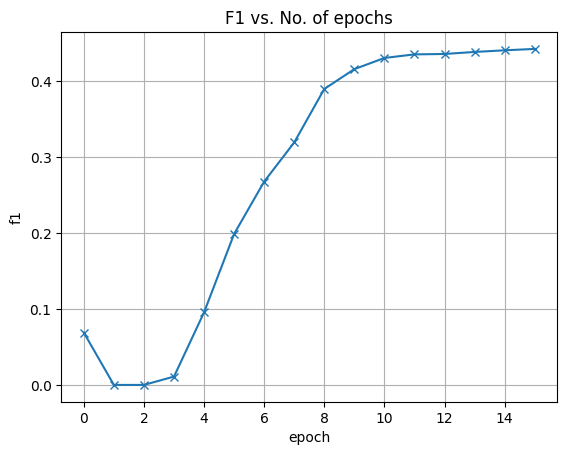

In [51]:
plt.plot(f1s, '-x')
plt.xlabel('epoch')
plt.ylabel('f1')
plt.grid()
plt.title('F1 vs. No. of epochs');

Ta tạo một mô hình mạng neural để tăng hiệu quả

In [52]:
class NeuralNetModel(LogRegModel):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10000, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 1)

    def forward(self, xb):
        out = F.relu(self.linear1(xb))
        out = F.relu(self.linear2(out))
        out = F.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [53]:
nn_model = to_device(NeuralNetModel(), get_default_device())

In [54]:
history = [evaluate(nn_model, val_dataloader)]
history

[{'val_loss': 13.62177814321315, 'val_acc': 0.9392619680851064, 'val_f1': 0.0}]

In [55]:
%%time
history += fit(5, 0.001, nn_model, train_dataloader, val_dataloader)

Epoch [0], val_loss: 3.2935, val_acc: 0.9422, val_f1: 0.4348
Epoch [1], val_loss: 3.8434, val_acc: 0.9396, val_f1: 0.4593
Epoch [2], val_loss: 3.8719, val_acc: 0.9352, val_f1: 0.4622
Epoch [3], val_loss: 5.2886, val_acc: 0.9343, val_f1: 0.4654
Epoch [4], val_loss: 6.4827, val_acc: 0.9264, val_f1: 0.4641
CPU times: user 19.9 s, sys: 220 ms, total: 20.2 s
Wall time: 20.4 s


Có thể thấy nếu tiếp tục sẽ bị overfit

In [65]:
def predict(model, test_dataloader):
    all_preds = []
    for batch in test_dataloader:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.cpu().numpy())
    return all_preds

In [59]:
test_inputs = vectorizer.transform(test_df['question_text'].head(50000))

In [60]:
test_tensors = F.normalize(torch.tensor(test_inputs.toarray(), dtype=torch.float32), dim=0)

In [61]:
test_datasets = TensorDataset(test_tensors)

In [62]:
test_dataloader = DataLoader(test_datasets, batch_size=batch_size)

In [63]:
test_dataloader = DeviceDataLoader(test_dataloader, get_default_device())

In [66]:
test_preds = predict(nn_model, test_dataloader)

In [68]:
print(test_preds)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 